In [80]:
import numpy as np
import pandas as pd

In [81]:
# Print values of weights and nodes
def printValues(do, dh, bo, bh, wo, wh, z, o):
    print('do')
    print(do)
    print('\ndh')
    print(dh)
    print('\nbo')
    print(bo)
    print('\nbh')
    print(bh)
    print('\nwo')
    print(wo)
    print('\nwh')
    print(wh)
    print('\nz')
    print(z)
    print('\no')
    print(o)

In [82]:
# Activation Function: Sigmoid function
def f(net):
    return 1 / (1 + np.exp(-net))

In [83]:
# Sample input data
x = np.matrix('.9,.8; .5,.6; .7,.7; .6,.5').T
y = np.matrix('.95; .5; .75; .5').T

In [84]:
# Visualization of dataset
d = {'Feature 1': x[0].tolist()[0], 'Feature 2': x[1].tolist()[0], 'Target': y[0].tolist()[0]}
pd.DataFrame(data=d)

,Feature 1,Feature 2,Target
0,0.9,0.8,0.95
1,0.5,0.6,0.50
2,0.7,0.7,0.75
3,0.6,0.5,0.50


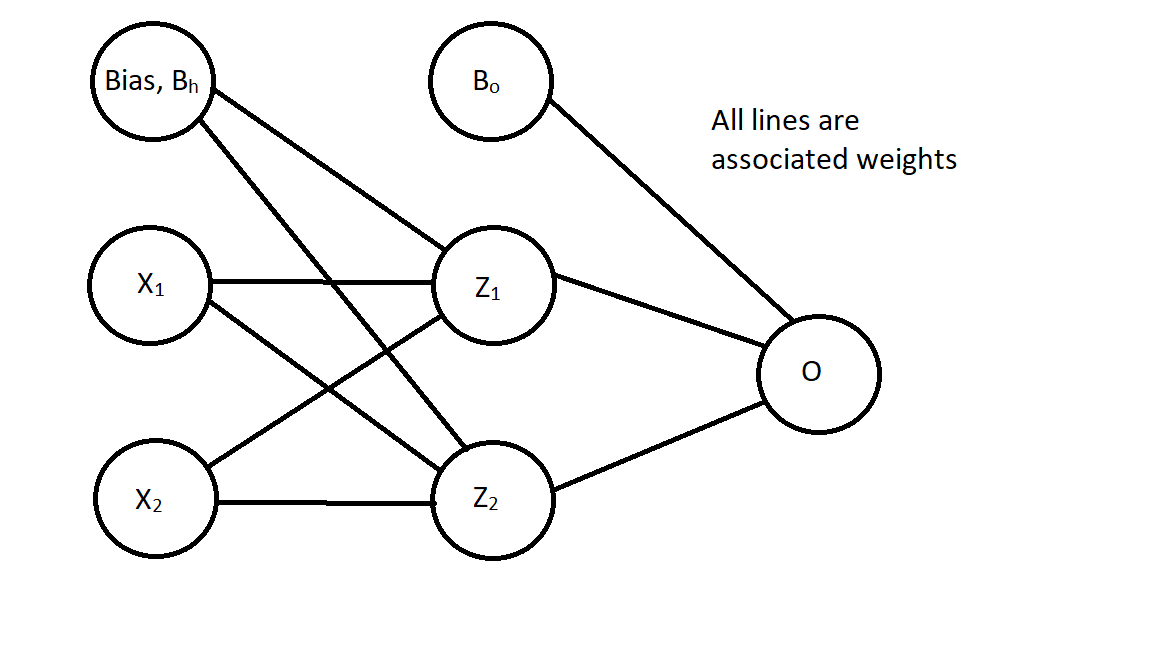

In [85]:
# Hidden layer with 2 nodes
z = np.matrix('0,0').T

# Output layer with 1 node
o = 0

# Weights of bias hidden and output layer
bh = np.matrix('0,0').T
bo = 0

# Weights of input hidden and output layer
wh = np.matrix('0,0;0,0')
wo = np.matrix('0,0').T

# Number of iterations to train the data
numEpochs = 1000

# Number of data points in the dataset
numRows = 4

for epoch in range(numEpochs):
    for i in range(numRows):
        
        # Feed forward: compute the hidden layer nodes and output node
        z = f(bh + np.dot(wh.T, x[:,i]))
        o = f(bo + np.dot(wo.T, z))

        # Back propogation: Use Gradient Descent to update weights and bias
        
        # Use Delta Rule to compute the derivatives.
        do = o*(1-o)*(o-y[:,i])
        dh = np.dot(z.T, (1-z))[0,0]*(wo*do)

        # Update the bias
        bo = bo - do
        bh = bh - dh

        # Update the weights
        wo = wo - z*do
        wh = wh - np.dot(x[:,i], dh.T)

#         print('\n################### Epoch: ' + str(epoch) + ' ###################')
#         print('################ Data row: ' + str(i) + ' ###################\n')
#         printValues(do, dh, bo, bh, wo, wh, z, o)

In [86]:
# Test the model
print('Predicted values')
for i in range(numRows):
        z = f(bh + np.dot(wh.T, x[:,i]))
        o = f(bo + np.dot(wo.T, z))
        print(o)

print('\nActual values')
print(y.T)

Predicted values
[[0.91257149]]
[[0.48217235]]
[[0.75811796]]
[[0.51086033]]

Actual values
[[0.95]
 [0.5 ]
 [0.75]
 [0.5 ]]
